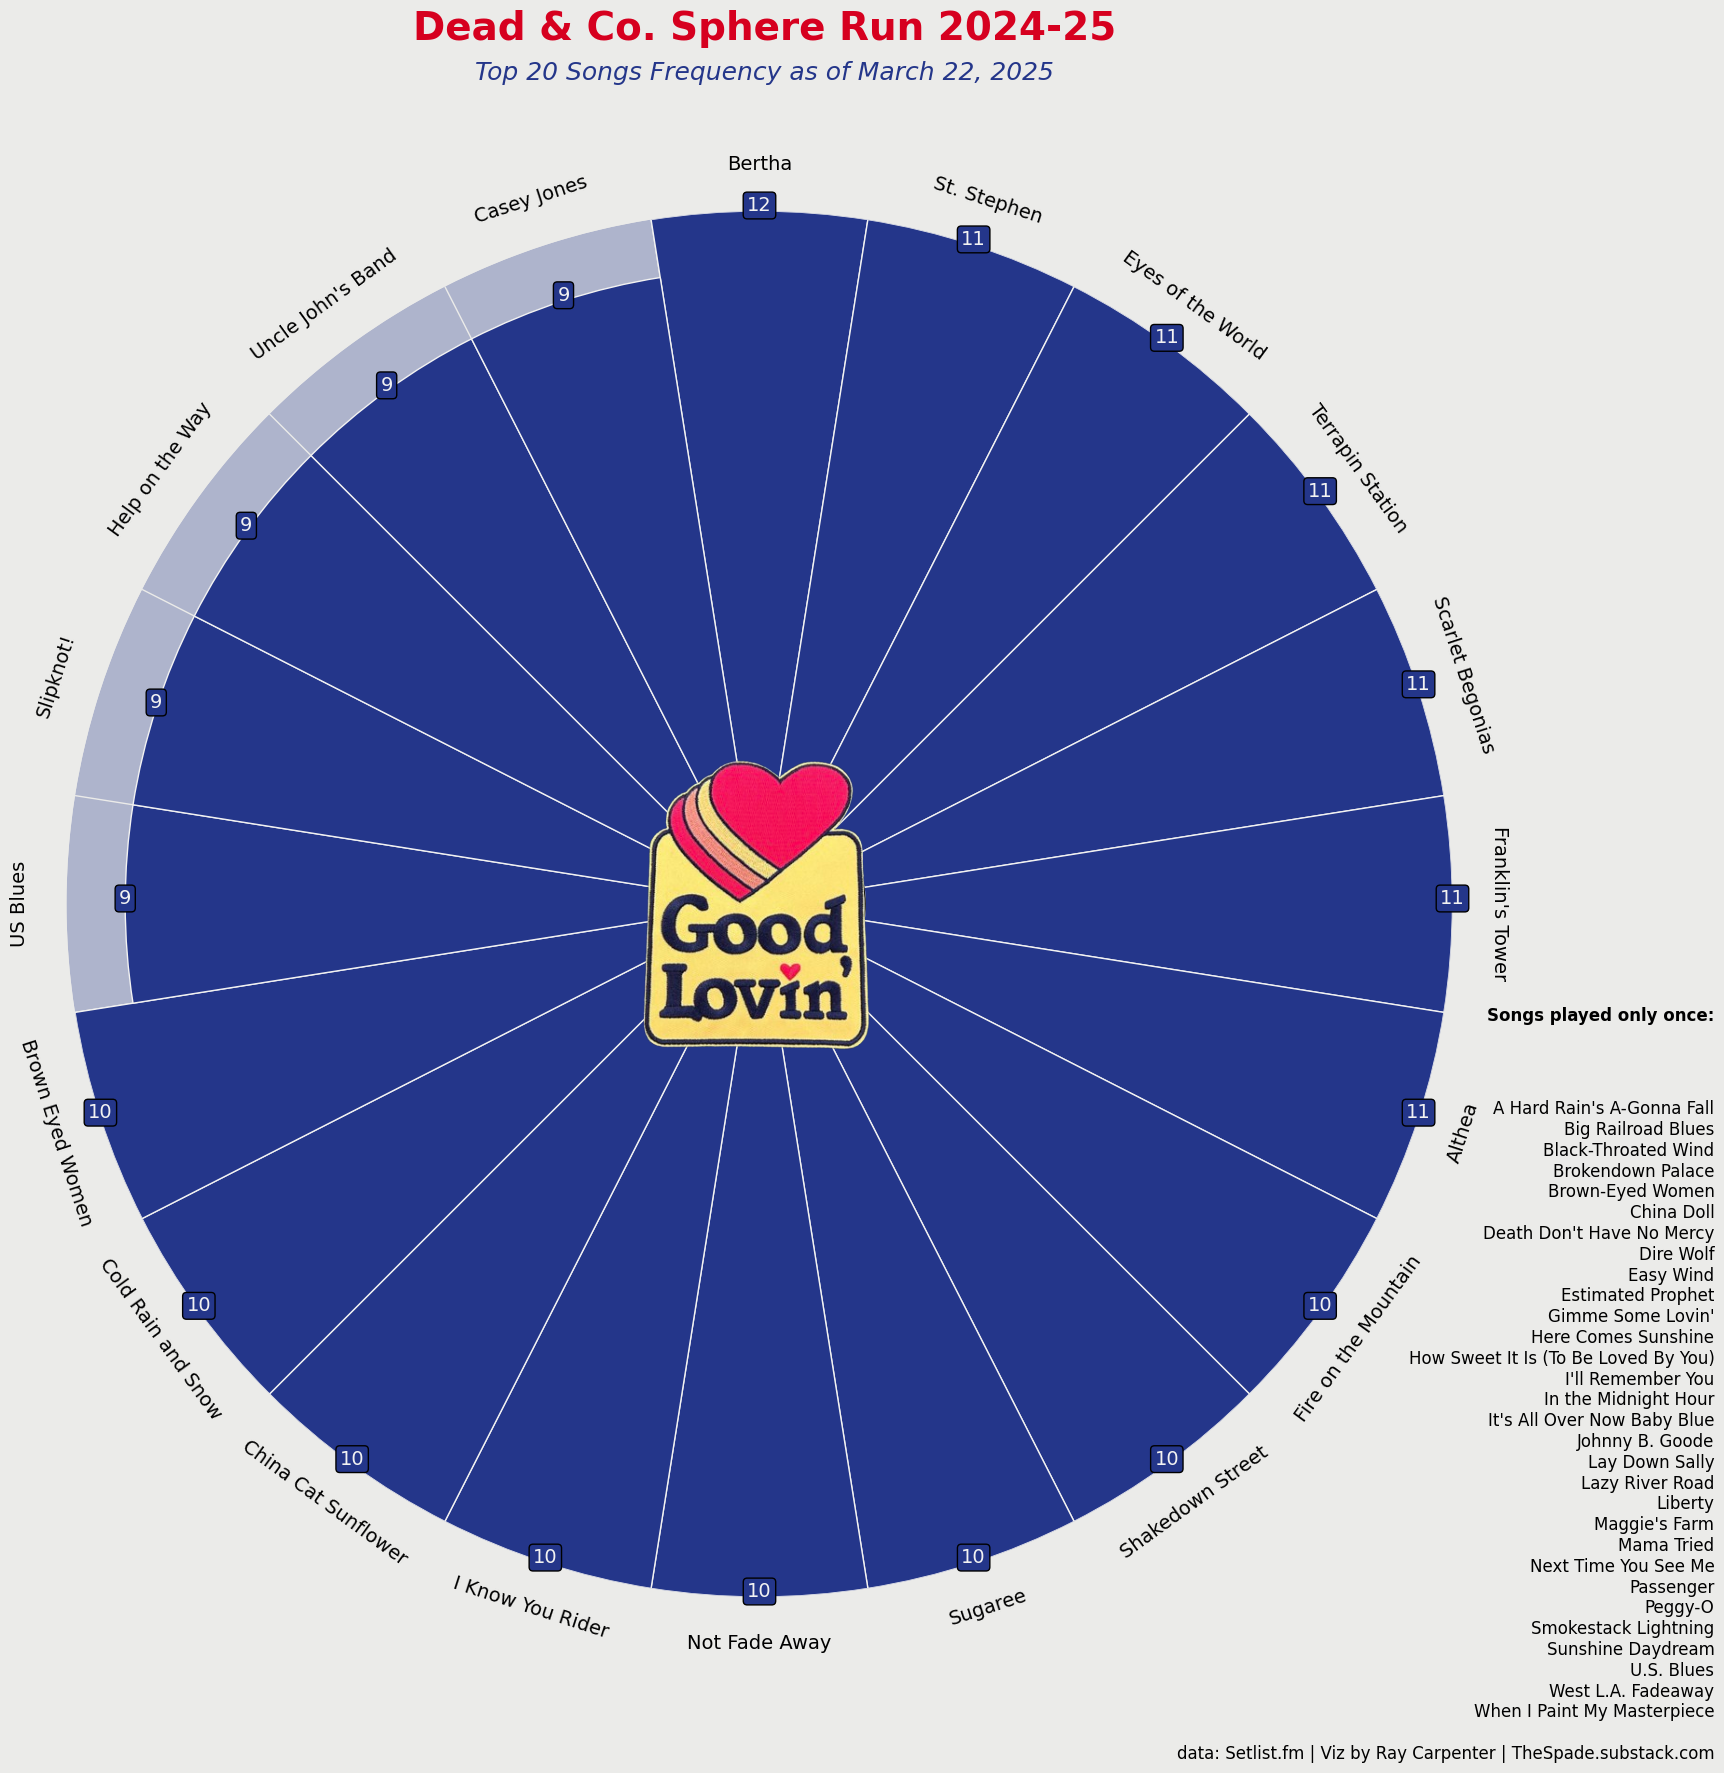

In [42]:
from mplsoccer import PyPizza, add_image
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

file_path = '/Users/raymondcarpenter/Documents/GitHub/dnc-sphere/dnc_sphere_data.csv'
data = pd.read_csv(file_path)

song_counts = data['Song'].value_counts()

params = song_counts.index.tolist()
values = song_counts.values.tolist()

filtered_params_values = [(p, v) for p, v in zip(params, values) if p not in ['Drums', 'Space']]
params, values = zip(*filtered_params_values)

top_n = 20
params = params[:top_n]
values = values[:top_n]

slice_colors = ["#24368a"] * len(params)
text_colors = ["#F2F2F2"] * len(params)

min_range = [0] * len(params)
max_range = [10] * len(params) 

baker = PyPizza(
    params=params,              
    background_color="#EBEBE9",    
    straight_line_color="#EBEBE9", 
    straight_line_lw=1,     
    last_circle_lw=0,        
    other_circle_lw=1,          
    other_circle_ls="-.",         
    inner_circle_size=18,         
    min_range=min_range,           
    max_range=max_range           
)

# Plot pizza
fig, ax = baker.make_pizza(
    values,                        
    figsize=(20, 18),               
    color_blank_space="same",        
    slice_colors=slice_colors,      
    value_colors=text_colors,       
    value_bck_colors=slice_colors,   
    blank_alpha=0.3,                
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                              
    kwargs_params=dict(
        color="#000000", fontsize=14,  
        va="center",
        fontfamily='sans-serif'
    ),                               
    kwargs_values=dict(
        color="#000000", fontsize=14,  
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        ),
        fontfamily='sans-serif'
    )                              
)

fig.text(
    0.515, 0.975, "Dead & Co. Sphere Run 2024-25", size=28,
    ha="center", color="#d6001f",
    fontdict={'family': 'sans-serif', 'weight': 'bold'}
)

fig.text(
    0.515, 0.953,
    "Top 20 Songs Frequency as of March 22, 2025",
    size=18,
    ha="center", color="#24368a",
    fontdict={'family': 'sans-serif', 'style': 'italic'}
)

one_play_songs = sorted(song_counts[song_counts == 1].index.tolist())
one_play_songs_text = "\n".join(one_play_songs)


CREDIT_2 = "data: Setlist.fm | Viz by Ray Carpenter | TheSpade.substack.com"

fig.text(
    0.99, 0.02, f"\n{one_play_songs_text}\n\n{CREDIT_2}", size=12,
    ha="right", color="#000000",
    fontdict={'family': 'sans-serif'}
)
fig.text(
    0.99, 0.43, "Songs played only once:", size=12,
    ha="right", color="#000000", weight='bold',
    fontdict={'family': 'sans-serif'}
)

image_path = '/Users/raymondcarpenter/Documents/GitHub/dnc-sphere/Screenshot_2025-03-22_at_5.01.09_PM-removebg-preview.png'  
image = Image.open(image_path)

ax_image = add_image(
    image, fig, left=0.38, bottom=0.38, width=0.25, height=0.25
)   

plt.show()

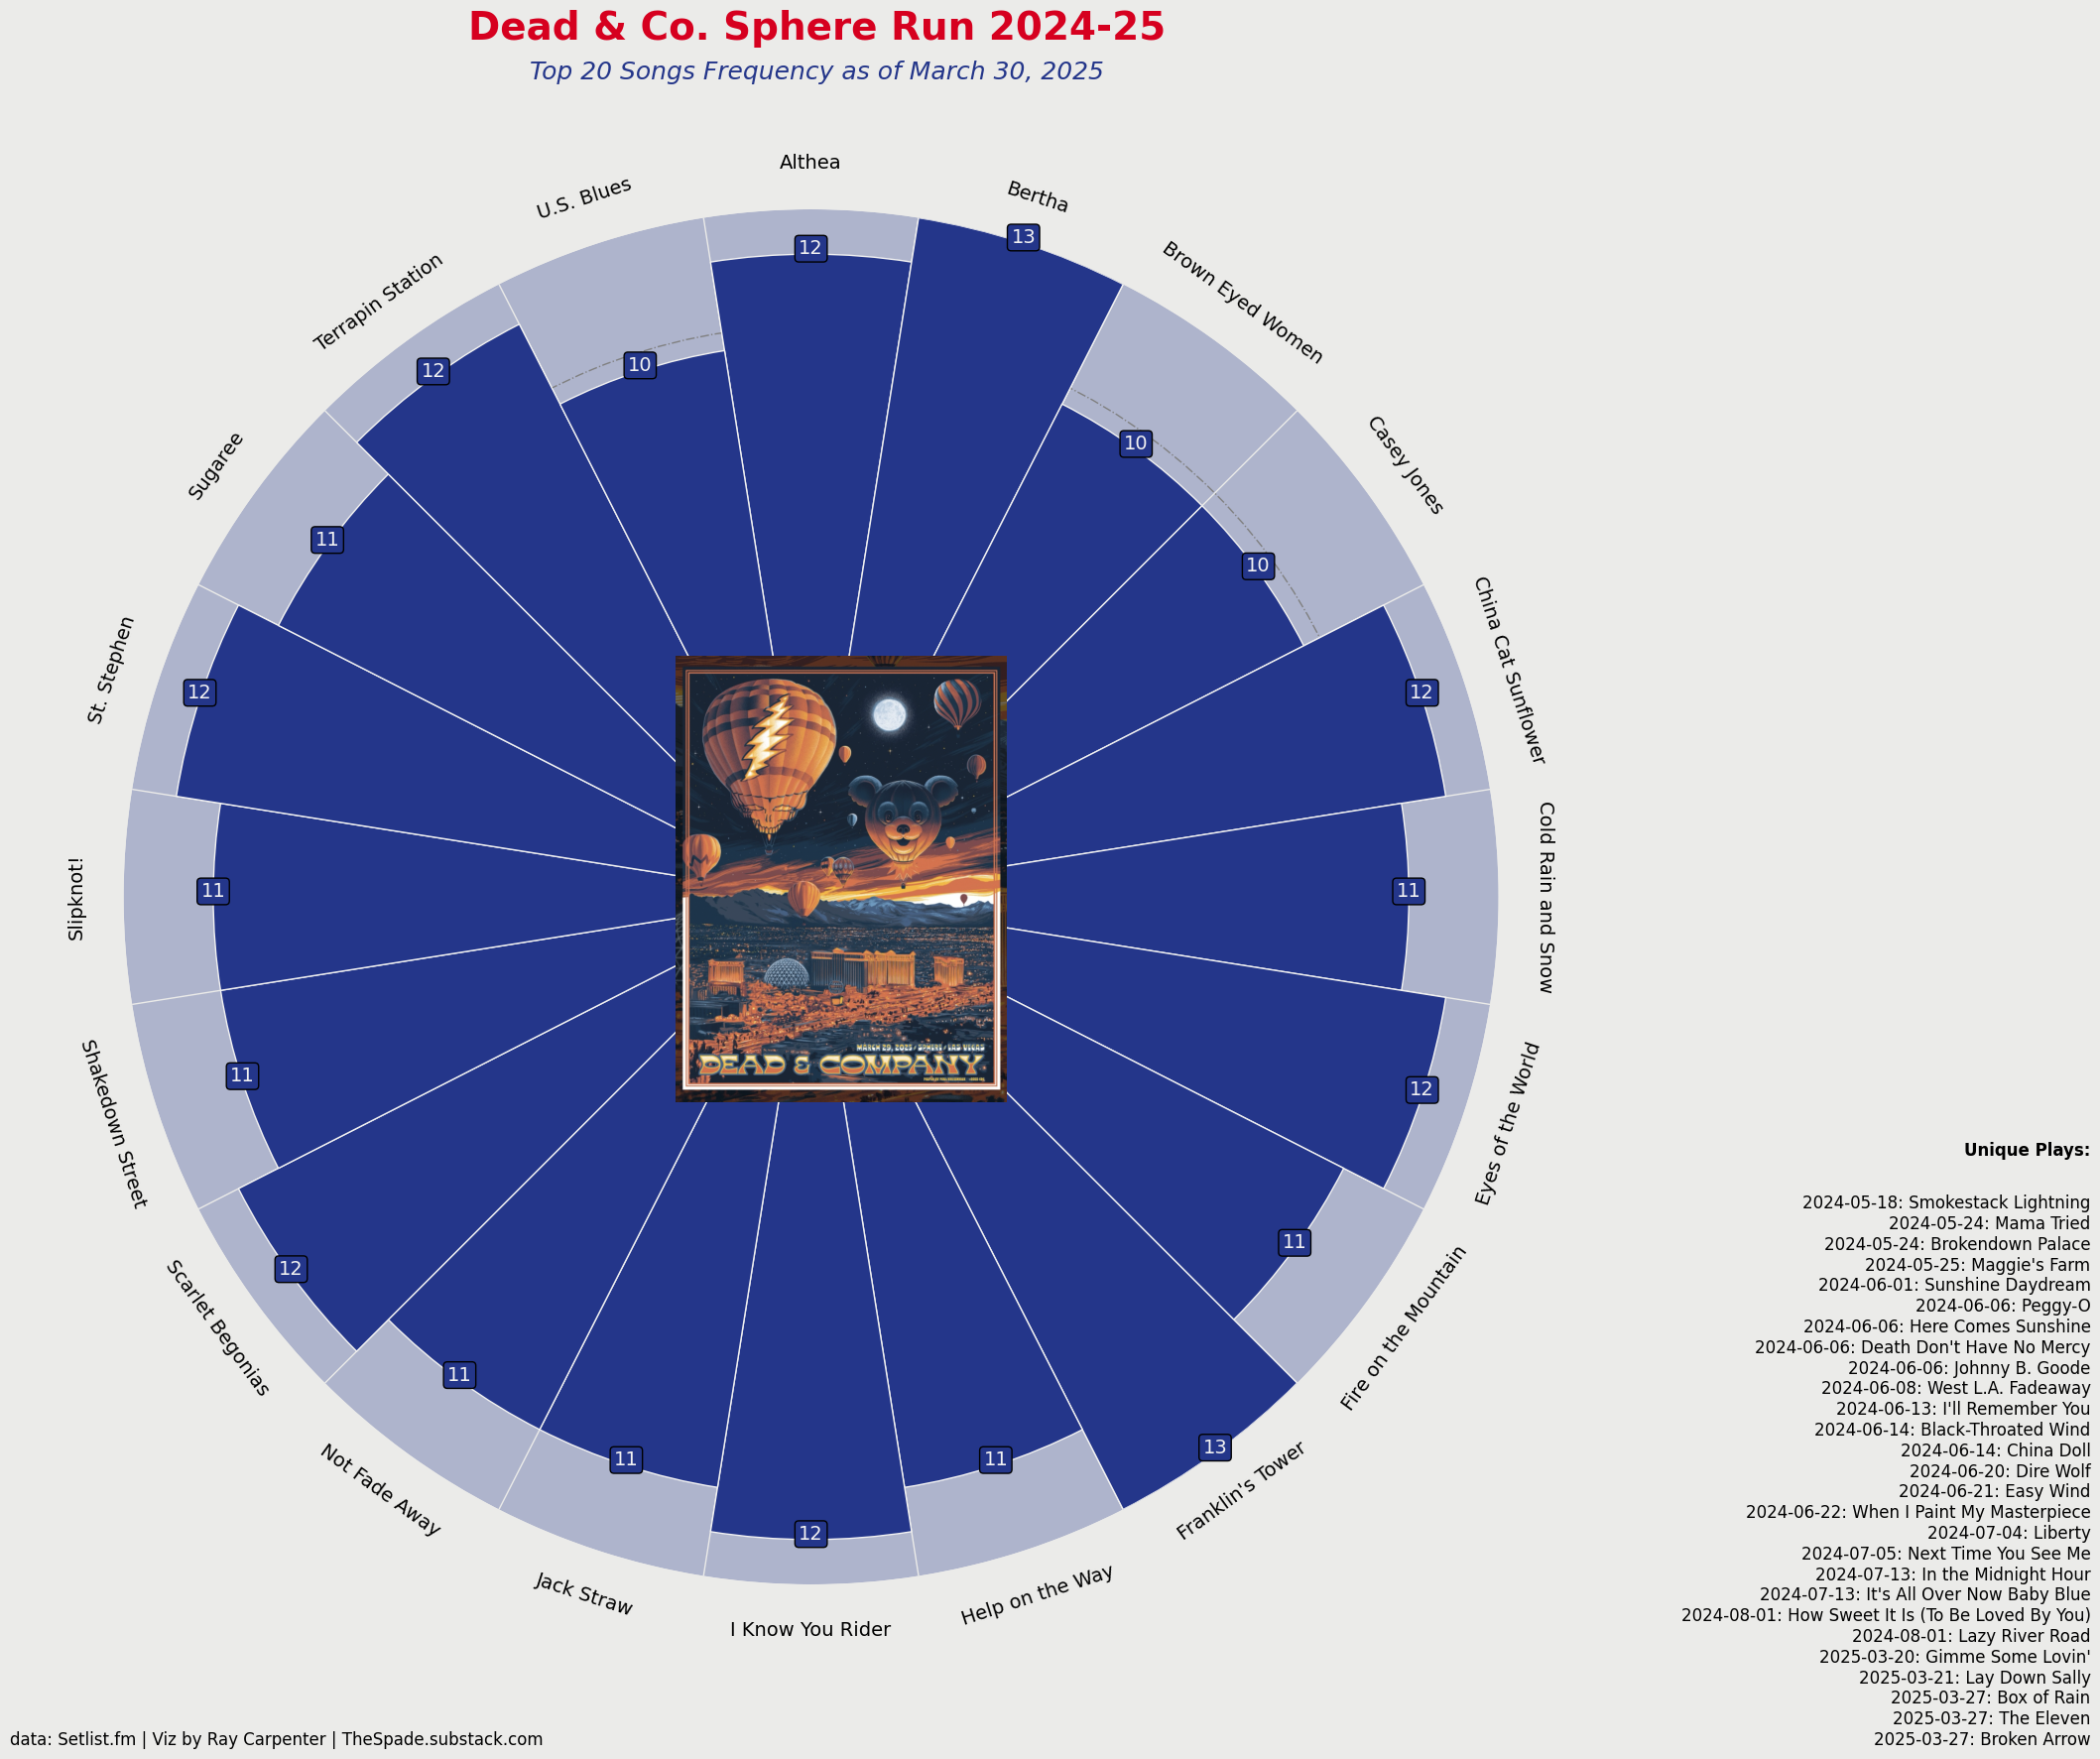

In [ ]:
from mplsoccer import PyPizza, add_image
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

file_path = '/Users/raymondcarpenter/Documents/GitHub/dnc-sphere/dnc_sphere_data.csv'
data = pd.read_csv(file_path)

data['Date'] = pd.to_datetime(data['Date'])

song_counts = data['Song'].value_counts().drop(labels=['Drums', 'Space'], errors='ignore')

top_20_songs = song_counts.head(20).sort_index()

params = top_20_songs.index.tolist()   
values = top_20_songs.values.tolist()

slice_colors = ["#24368a"] * len(params)
text_colors = ["#F2F2F2"] * len(params)

min_range = [0] * len(params)
max_val = max(values)
max_range = [max_val] * len(params)

baker = PyPizza(
    params=params,
    background_color="#EBEBE9",
    straight_line_color="#EBEBE9",
    straight_line_lw=1,
    last_circle_lw=0,
    other_circle_lw=1,
    other_circle_ls="-.",
    inner_circle_size=18,
    min_range=min_range,
    max_range=max_range
)

fig, ax = baker.make_pizza(
    values,
    figsize=(24, 18), 
    color_blank_space="same",
    slice_colors=slice_colors,
    value_colors=text_colors,
    value_bck_colors=slice_colors,
    blank_alpha=0.3,
    kwargs_slices=dict(edgecolor="#F2F2F2", zorder=2, linewidth=1),
    kwargs_params=dict(color="#000000", fontsize=14, va="center", fontfamily='sans-serif'),
    kwargs_values=dict(
        color="#000000", fontsize=14, zorder=3,
        bbox=dict(edgecolor="#000000", facecolor="cornflowerblue",
                  boxstyle="round,pad=0.2", lw=1),
        fontfamily='sans-serif'
    )
)

fig.text(
    0.515, 0.975, "Dead & Co. Sphere Run 2024-25", size=28,
    ha="center", color="#d6001f",
    fontdict={'family': 'sans-serif', 'weight': 'bold'}
)
fig.text(
    0.515, 0.953,
    "Top 20 Songs Frequency as of March 30, 2025",
    size=18,
    ha="center", color="#24368a",
    fontdict={'family': 'sans-serif', 'style': 'italic'}
)

image_path = 'march_29_show.png'
try:
    image = Image.open(image_path)
    add_image(image, fig, left=0.40, bottom=0.38, width=0.25, height=0.25)
except FileNotFoundError:
    print("Image not found, skipping add_image.")

one_play_songs = song_counts[song_counts == 1].index.tolist()
one_play_data = data[data['Song'].isin(one_play_songs)].copy()
one_play_data.sort_values('Date', inplace=True)

one_play_list = one_play_data.apply(
    lambda row: f"{row['Date'].strftime('%Y-%m-%d')}: {row['Song']}", axis=1
).tolist()

one_play_text = "\n".join(one_play_list)

fig.text(
    1.05, 0.35, "Unique Plays:", size=12,
    ha="right", color="#000000", weight='bold',
    fontdict={'family': 'sans-serif'}
)
fig.text(
    1.05, 0.02, one_play_text, size=12,
    ha="right", color="#000000",
    fontdict={'family': 'sans-serif'}
)

CREDIT_2 = "data: Setlist.fm | Viz by Ray Carpenter | TheSpade.substack.com"
fig.text(
    0.4, 0.02, CREDIT_2, size=12,
    ha="right", color="#000000",
    fontdict={'family': 'sans-serif'}
)

plt.show()